https://dzen.ru/media/id/62f209e189f70109ff1e4e91/python-izvlekaem-istoricheskie-dannye-rossiiskih-akcii-62f356de6e5654155704d2eb

In [1]:
import requests
import apimoex
import pandas as pd

In [2]:
with requests.Session() as session:
    data = apimoex.get_board_history(session, 'GAZP')
    df = pd.DataFrame(data)
    df.set_index('TRADEDATE', inplace=True)
    print(df.head(), '\n')
    print(df.tail(), '\n')
    df.info()

           BOARDID   CLOSE    VOLUME         VALUE
TRADEDATE                                         
2014-06-09    TQBR  144.40  40347300  5.851239e+09
2014-06-10    TQBR  144.75  41460990  5.956067e+09
2014-06-11    TQBR  146.40  39418520  5.725373e+09
2014-06-16    TQBR  145.20  77165360  1.113453e+10
2014-06-17    TQBR  144.77  44370530  6.436430e+09 

           BOARDID   CLOSE    VOLUME         VALUE
TRADEDATE                                         
2023-02-07    TQBR  159.87  13954930  2.234075e+09
2023-02-08    TQBR  158.18  16688290  2.651242e+09
2023-02-09    TQBR  159.19  27661050  4.405527e+09
2023-02-10    TQBR  158.68   9874270  1.567193e+09
2023-02-13    TQBR  158.01  11418540  1.808640e+09 

<class 'pandas.core.frame.DataFrame'>
Index: 2191 entries, 2014-06-09 to 2023-02-13
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BOARDID  2191 non-null   object 
 1   CLOSE    2173 non-null   float64
 2   VOLUME   

Решение №2

In [3]:
import datetime
import pandas_datareader

In [5]:
start_date = datetime.datetime(2019,10,31)
end_date = datetime.datetime.today()

In [4]:
code = 'GAZP'

In [12]:
data = pandas_datareader.DataReader(code, 'moex', start=start_date, end=end_date)
#print(data.tail(10))
print(data[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']].tail(10))

              OPEN    HIGH     LOW   CLOSE      VOLUME
TRADEDATE                                             
2023-01-31  158.41  160.00  158.00  158.10  15129060.0
2023-02-01  158.30  158.66  157.54  158.12  14240340.0
2023-02-02  158.44  158.59  157.31  158.10  11991300.0
2023-02-03  158.09  163.96  156.76  160.87  69539880.0
2023-02-06  160.68  161.76  158.91  160.14  28144330.0
2023-02-07  160.50  161.35  159.51  159.87  13954930.0
2023-02-08  160.01  160.42  157.82  158.18  16688290.0
2023-02-09  158.50  160.44  157.60  159.19  27661050.0
2023-02-10  159.07  159.46  158.32  158.68   9874270.0
2023-02-13  159.47  159.47  158.00  158.01  11418540.0


MEAN

In [8]:
data['Moving_average'] = data['CLOSE'].rolling(window=20, min_periods = 1, center = False).mean()
#data.tail(10)
print(data[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'Moving_average']].tail(10))

              OPEN    HIGH     LOW   CLOSE      VOLUME  Moving_average
TRADEDATE                                                             
2023-01-31  158.41  160.00  158.00  158.10  15129060.0        161.2485
2023-02-01  158.30  158.66  157.54  158.12  14240340.0        161.0290
2023-02-02  158.44  158.59  157.31  158.10  11991300.0        160.8740
2023-02-03  158.09  163.96  156.76  160.87  69539880.0        160.8125
2023-02-06  160.68  161.76  158.91  160.14  28144330.0        160.6840
2023-02-07  160.50  161.35  159.51  159.87  13954930.0        160.5725
2023-02-08  160.01  160.42  157.82  158.18  16688290.0        160.1900
2023-02-09  158.50  160.44  157.60  159.19  27661050.0        159.9410
2023-02-10  159.07  159.46  158.32  158.68   9874270.0        159.6470
2023-02-13  159.47  159.47  158.00  158.01  11418540.0        159.2575


<AxesSubplot: xlabel='TRADEDATE'>

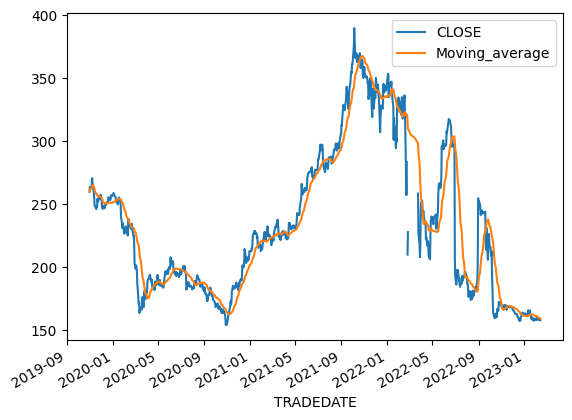

In [10]:
data[['CLOSE','Moving_average']].plot()